# Import

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_rel

from src.main.config import create_config

# File

In [2]:
FILE = "results/grid_search_SRMP_test/test_results.csv"

# Read file

In [3]:
df = pd.read_csv(FILE)
df

,M,N_tr,Atr_id,Mo,Ko,Mo_id,N_bc,Error,Me,Ke,Method,Config,N_te,Ate_id,Fitness,Kendall's tau
0,11,50,1,SRMP,3,1,100,0,SRMP,3,SA,27,50,1,0.678367,0.356735
1,11,50,1,SRMP,3,1,100,0,SRMP,3,SA,15,50,1,0.709388,0.418776
2,11,50,1,SRMP,3,1,100,0,SRMP,3,SA,73,50,1,0.806531,0.613061
3,11,50,1,SRMP,3,1,100,0,SRMP,3,SA,41,50,1,0.784490,0.568980
4,11,50,1,SRMP,3,1,100,0,SRMP,3,SA,3,50,1,0.666122,0.332245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,11,50,5,SRMP,3,5,100,0,SRMP,3,SA,116,50,5,0.724082,0.447530
1246,11,50,5,SRMP,3,5,100,0,SRMP,3,SA,118,50,5,0.679184,0.357697
1247,11,50,5,SRMP,3,5,100,0,SRMP,3,SA,120,50,5,0.693061,0.385463
1248,11,50,5,SRMP,3,5,100,0,SRMP,3,SA,123,50,5,0.586939,0.173132


# Configs

In [4]:
CONFIGS = "results/grid_search_SRMP_test/configs.csv"
df_config = pd.read_csv(CONFIGS, index_col=0)
for id, row in df_config.iterrows():
    config = create_config(**(eval(row["Config"]) | {"method": row["Method"]}))
    df_config.loc[id, "T0_coef"] = config.T0_coef
    df_config.loc[id, "alpha"] = config.alpha
    df_config.loc[id, "amp"] = config.amp
df_config.drop(columns="Config", inplace=True)
df_config

,Method,T0_coef,alpha,amp
Id,,,,
0,SA,0.1,0.99900,0.1
1,SA,0.1,0.99900,0.2
2,SA,0.1,0.99900,0.3
3,SA,0.1,0.99900,0.4
4,SA,0.1,0.99900,0.5
...,...,...,...,...
120,SA,10.0,0.99999,0.1
121,SA,10.0,0.99999,0.2
122,SA,10.0,0.99999,0.3


In [5]:
df = pd.merge(df, df_config, left_on="Config", right_on="Id")
df

,M,N_tr,Atr_id,Mo,Ko,Mo_id,N_bc,Error,Me,Ke,Method_x,Config,N_te,Ate_id,Fitness,Kendall's tau,Method_y,T0_coef,alpha,amp
0,11,50,1,SRMP,3,1,100,0,SRMP,3,SA,27,50,1,0.678367,0.356735,SA,0.5,0.99900,0.3
1,11,50,1,SRMP,3,1,100,0,SRMP,3,SA,15,50,1,0.709388,0.418776,SA,0.1,0.99995,0.1
2,11,50,1,SRMP,3,1,100,0,SRMP,3,SA,73,50,1,0.806531,0.613061,SA,1.0,0.99999,0.4
3,11,50,1,SRMP,3,1,100,0,SRMP,3,SA,41,50,1,0.784490,0.568980,SA,0.5,0.99995,0.2
4,11,50,1,SRMP,3,1,100,0,SRMP,3,SA,3,50,1,0.666122,0.332245,SA,0.1,0.99900,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,11,50,5,SRMP,3,5,100,0,SRMP,3,SA,116,50,5,0.724082,0.447530,SA,10.0,0.99995,0.2
1246,11,50,5,SRMP,3,5,100,0,SRMP,3,SA,118,50,5,0.679184,0.357697,SA,10.0,0.99995,0.4
1247,11,50,5,SRMP,3,5,100,0,SRMP,3,SA,120,50,5,0.693061,0.385463,SA,10.0,0.99999,0.1
1248,11,50,5,SRMP,3,5,100,0,SRMP,3,SA,123,50,5,0.586939,0.173132,SA,10.0,0.99999,0.4


In [31]:
df_grouped = df.groupby("Config").mean(True).sort_values("Fitness", ascending=False)
df_grouped.head(10)

,M,N_tr,Atr_id,Ko,Mo_id,N_bc,Error,Ke,N_te,Ate_id,Fitness,Kendall's tau,T0_coef,alpha,amp
Config,,,,,,,,,,,,,,,
70,11.0,50.0,4.5,3.0,4.5,100.0,0.0,3.0,50.0,4.5,0.830857,0.661661,1.0,0.99999,0.1
66,11.0,50.0,4.5,3.0,4.5,100.0,0.0,3.0,50.0,4.5,0.806857,0.613650,1.0,0.99995,0.2
40,11.0,50.0,4.5,3.0,4.5,100.0,0.0,3.0,50.0,4.5,0.806449,0.612774,0.5,0.99995,0.1
107,11.0,50.0,4.5,3.0,4.5,100.0,0.0,3.0,50.0,4.5,0.803429,0.606800,10.0,0.99950,0.3
35,11.0,50.0,4.5,3.0,4.5,100.0,0.0,3.0,50.0,4.5,0.801633,0.603073,0.5,0.99990,0.1
65,11.0,50.0,4.5,3.0,4.5,100.0,0.0,3.0,50.0,4.5,0.800898,0.601679,1.0,0.99995,0.1
55,11.0,50.0,4.5,3.0,4.5,100.0,0.0,3.0,50.0,4.5,0.800735,0.601298,1.0,0.99950,0.1
41,11.0,50.0,4.5,3.0,4.5,100.0,0.0,3.0,50.0,4.5,0.799102,0.598081,0.5,0.99995,0.2
85,11.0,50.0,4.5,3.0,4.5,100.0,0.0,3.0,50.0,4.5,0.797551,0.594983,5.0,0.99990,0.1


In [58]:
df_grouped.loc[68]

M                 11.000000
N_tr              50.000000
Atr_id             4.500000
Ko                 3.000000
Mo_id              4.500000
N_bc             100.000000
Error              0.000000
Ke                 3.000000
N_te              50.000000
Ate_id             4.500000
Fitness            0.775347
Kendall's tau      0.550558
T0_coef            1.000000
alpha              0.999950
amp                0.400000
Name: 68, dtype: float64

# Plot

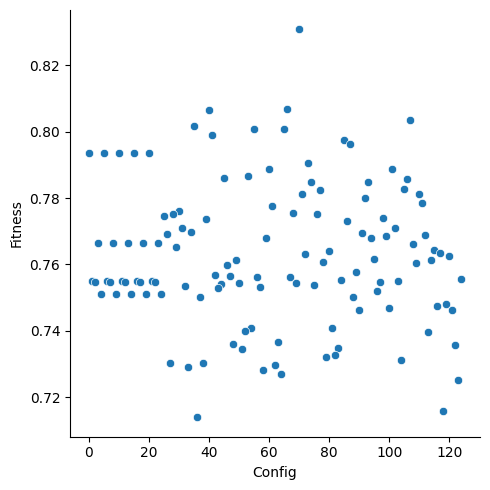

In [7]:
sns.relplot(df_grouped, x="Config", y="Fitness")

In [35]:
best = {df_grouped["Fitness"].idxmax()}
rest = set(df_grouped.index) - best
best

{70}

In [9]:
ttest_rel(df.loc[df["Config"] == 0, "Fitness"], df.loc[df["Config"] == 70, "Fitness"], alternative="less").pvalue

0.06919613937958292

In [36]:
i = 0
for config in df_grouped.index:
    if all(ttest_rel(df.loc[df["Config"] == config, ["Atr_id", "Fitness"]].set_index("Atr_id").sort_index(), df.loc[df["Config"] == config_best, ["Atr_id", "Fitness"]].set_index("Atr_id").sort_index(), alternative="less").pvalue > 0.05 for config_best in best):
        best.add(config)
    else:
        i+=1
    print(best)
    if i >= 20:
        break
rest -= best
best

{70}
{66, 70}
{40, 66, 70}
{40, 66, 107, 70}
{66, 35, 70, 40, 107}
{65, 66, 35, 70, 40, 107}
{65, 66, 35, 70, 40, 107, 55}
{65, 66, 35, 70, 40, 41, 107, 55}
{65, 66, 35, 70, 40, 41, 107, 85, 55}
{65, 66, 35, 70, 40, 41, 107, 85, 55}
{65, 66, 35, 70, 40, 41, 107, 15, 85, 55}
{65, 66, 35, 70, 40, 41, 107, 15, 85, 55}
{65, 66, 35, 70, 40, 41, 107, 15, 85, 55}
{65, 66, 35, 70, 40, 41, 107, 15, 85, 55}
{65, 66, 35, 70, 40, 41, 107, 15, 85, 55}
{65, 66, 35, 70, 40, 41, 107, 15, 85, 55}
{65, 66, 35, 70, 40, 41, 107, 15, 85, 55, 60}
{65, 66, 35, 101, 70, 40, 41, 107, 15, 85, 55, 60}
{65, 66, 35, 101, 70, 40, 41, 107, 15, 85, 53, 55, 60}
{65, 66, 35, 101, 70, 40, 41, 107, 15, 85, 53, 55, 60}
{65, 66, 35, 101, 70, 40, 41, 106, 107, 15, 85, 53, 55, 60}
{65, 66, 35, 101, 70, 40, 41, 106, 107, 15, 85, 53, 55, 60}
{65, 66, 35, 101, 70, 40, 41, 106, 107, 74, 15, 85, 53, 55, 60}
{65, 66, 35, 101, 70, 40, 41, 106, 107, 74, 15, 85, 53, 55, 60}
{65, 66, 35, 101, 70, 40, 41, 106, 107, 74, 77, 15, 85, 53, 

{15, 35, 40, 41, 53, 55, 60, 61, 65, 66, 68, 70, 74, 77, 85, 101, 106, 107}

In [37]:
df_config.loc[list(best)]

,Method,T0_coef,alpha,amp
Id,,,,
65,SA,1.0,0.99995,0.1
66,SA,1.0,0.99995,0.2
35,SA,0.5,0.99990,0.1
68,SA,1.0,0.99995,0.4
101,SA,10.0,0.99900,0.2
70,SA,1.0,0.99999,0.1
40,SA,0.5,0.99995,0.1
41,SA,0.5,0.99995,0.2
106,SA,10.0,0.99950,0.2


In [12]:
df.loc[df["Config"] == 70, ["Atr_id", "Fitness"]].set_index("Atr_id").sort_index()

,Fitness
Atr_id,
0,0.856327
1,0.851429
2,0.755918
3,0.884898
4,0.804082
5,0.844082
6,0.882449
7,0.820408
8,0.748571


In [42]:
df.loc[df["Config"] == 68, ["Atr_id", "Fitness"]].set_index("Atr_id").sort_index()

,Fitness
Atr_id,
0,0.781224
1,0.791837
2,0.831020
3,0.816327
4,0.804082
5,0.547755
6,0.918367
7,0.729796
8,0.770612


In [14]:
df.loc[df["Config"] == 87, ["Atr_id", "Fitness"]].set_index("Atr_id").sort_index()

,Fitness
Atr_id,
0,0.843265
1,0.892245
2,0.795102
3,0.852245
4,0.702857
5,0.761633
6,0.909388
7,0.777143
8,0.693878


In [47]:
ttest_rel(df.loc[df["Config"] == 68, ["Atr_id", "Fitness"]].set_index("Atr_id").sort_index(), df.loc[df["Config"] == 70, ["Atr_id", "Fitness"]].set_index("Atr_id").sort_index(), alternative="less").pvalue

array([0.06180357])

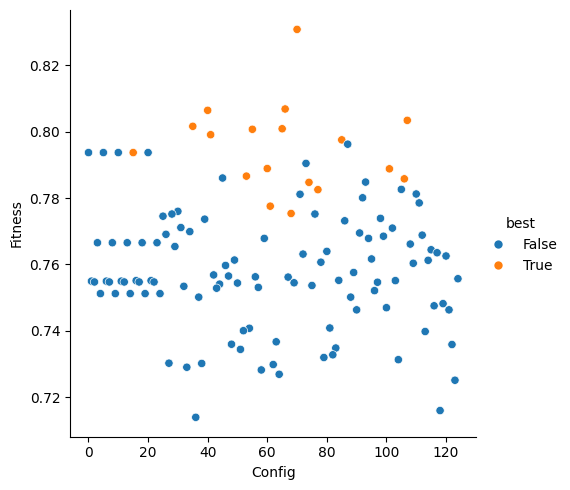

In [38]:
df_grouped_bis = df_grouped.copy()
df_grouped_bis["best"] = [x in best for x in df_grouped_bis.index]
sns.relplot(df_grouped_bis, x="Config", y="Fitness", hue="best")

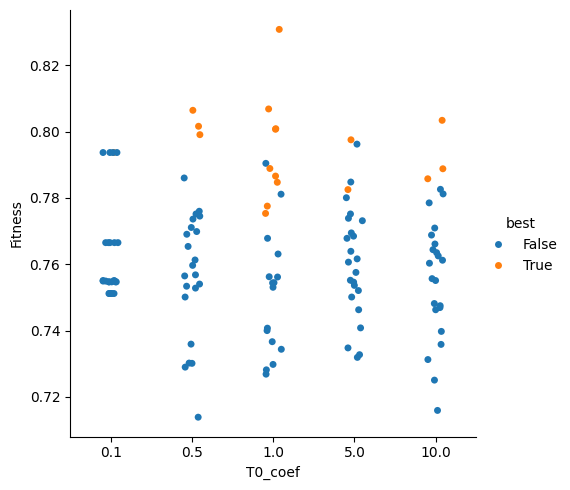

In [39]:
df_grouped_bis = df_grouped.copy()
df_grouped_bis["best"] = [x in best for x in df_grouped_bis.index]
sns.catplot(df_grouped_bis, x="T0_coef", y="Fitness", hue="best")

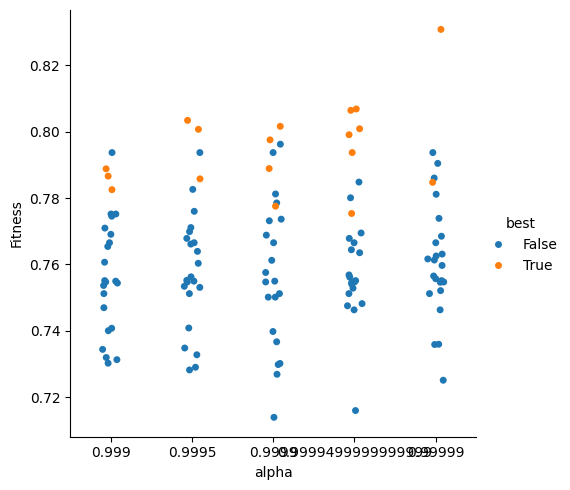

In [40]:
df_grouped_bis = df_grouped.copy()
df_grouped_bis["best"] = [x in best for x in df_grouped_bis.index]
sns.catplot(df_grouped_bis, x="alpha", y="Fitness", hue="best")

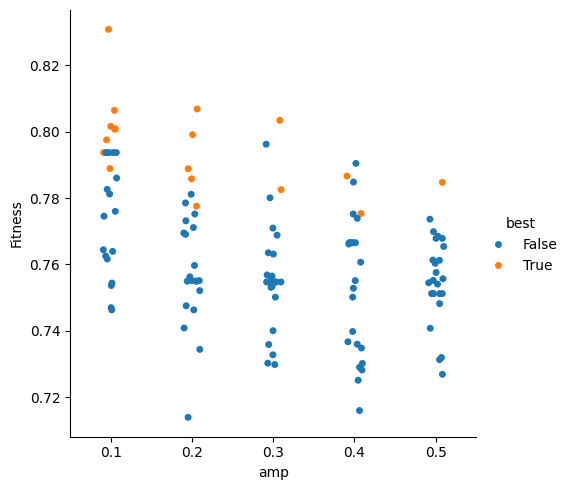

In [41]:
df_grouped_bis = df_grouped.copy()
df_grouped_bis["best"] = [x in best for x in df_grouped_bis.index]
sns.catplot(df_grouped_bis, x="amp", y="Fitness", hue="best")